Imports, plotting inline, and random seed

In [1]:
import time
import sklearn
import matplotlib.pyplot as plt
from IPython import display
from sklearn.datasets import fetch_mldata
import numpy as np
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(seed=495)

Initial values

In [2]:
n = 784   # number of image pixels
m = 60000   # number of images in training set
eta = 0.1  # learning rate parameter
epsinit = 0.01  # initial size of synaptic weights
w = epsinit*np.random.rand(n)   # random initialization of weight vector
b = epsinit*np.random.rand(1)    # random initialization of bias 

tmax = 60000           # number of learning updates
errcl = np.zeros(tmax)    # classification error vs. time

Set up train and test data.

In [8]:
mnist = fetch_mldata('MNIST original', data_home="data")

shuffled_indices = np.random.permutation(np.arange(mnist.data.shape[0]))
train_indices = shuffled_indices[:m]
test_indices = shuffled_indices[m:]

trainimages = mnist.data[train_indices, :]
trainlabels = mnist.target[train_indices]

testimages = mnist.data[test_indices, :]
testlabels = mnist.data[test_indices]

Functions to visualize training (output weight vector, input vector, running error).

In [4]:
def plot_image(image):
    nr, nc = image.shape 
    extent = [-0.5, nc-0.5, nr-0.5, -0.5] 
    plt.imshow(image, extent=extent, origin='upper', interpolation='nearest') 

    
def visualize(t, errcl, w, x):
    errorrate = np.divide(
        np.cumsum(errcl[: t + 1]),
        range(1, t + 2)
    )

    display.clear_output(wait=True)

    plt.subplot(1, 3, 1)
    plot_image(np.reshape(w, [28, 28]))
    plt.title("weight vector at t = " + str(t + 1))

    plt.subplot(1, 3, 2)
    plot_image(np.reshape(x, [28, 28]))
    plt.title("input vector")

    plt.subplot(1, 3, 3)
    plt.plot(errorrate, color='red')
    plt.title("average class error = " + str(errorrate[t]))
    plt.ylim(0, 1)

    plt.subplots_adjust(wspace=.5)

    plt.gcf().set_size_inches(18.5, 10.5)
    display.display(plt.gcf())

The trainining loop.

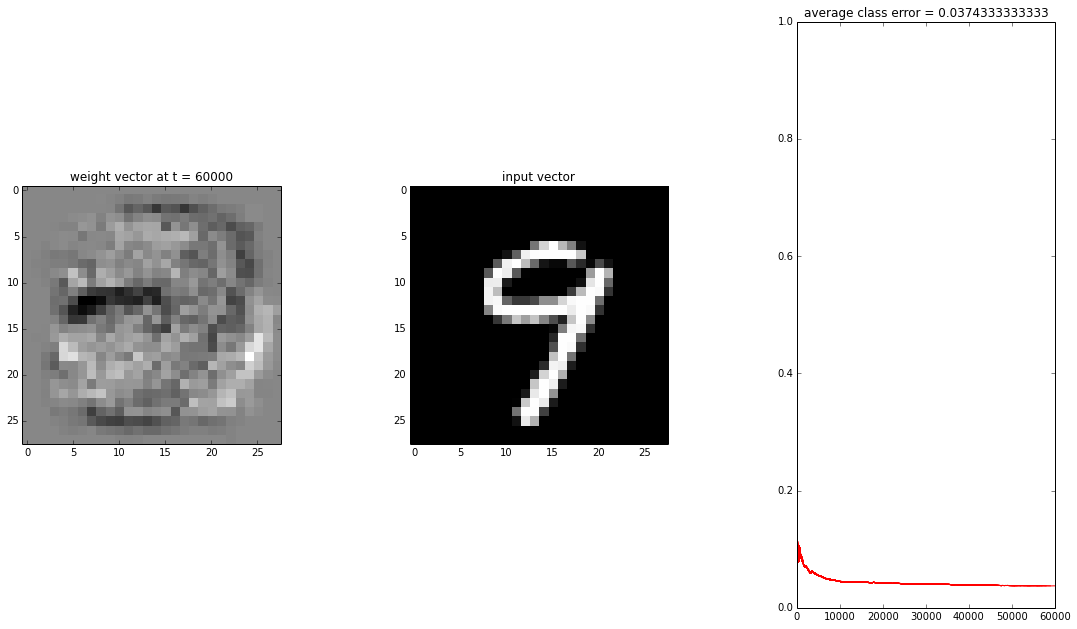

In [5]:
for t in range(0, tmax):     # iterate over the train steps
    i = int(np.floor(m * np.random.rand()))    # choose a random example
    x = trainimages[i, :] / 255.0              # normalize max value to one
    desired = np.float64(trainlabels[i] == 2)  # get true label as a float
    actual = np.float64(np.dot(w, x) + b > 0)  # get predicted label as a float
    delta = desired - actual
    errcl[t] = abs(desired - actual)           # error between true and predicted
    w += eta * delta * x                       # weight update
    b += eta * delta                           # bias update
    if t % 1000 == 0:    # display every 1000 time steps
        visualize(t, errcl, w, x)        
        time.sleep(0.01)

# show final statistics
visualize(t, errcl, w, x)  
display.clear_output(wait=True)